# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras import layers

In [7]:
#建立模型
#宣告採用序列模型
model = Sequential()
model.add(layers.Dense(256, activation='relu', kernel_initializer='normal', input_shape=(784,)))
model.add(layers.Dense(256, activation='relu', kernel_initializer='normal', input_shape=(784,)))
model.add(layers.Dense(10, kernel_initializer='normal', activation='softmax'))

model.summary()

W1130 20:17:27.621580 10648 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1130 20:17:27.634573 10648 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1130 20:17:27.636573 10648 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W1130 20:17:31.409110 10648 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1130 20:17:31.424104 10648 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, 
                         batch_size=32,
                         verbose=1)

W1130 20:17:32.840709 10648 deprecation.py:323] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1130 20:17:32.871716 10648 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 132us/step - loss: 0.2396 - acc: 0.9288 - val_loss: 0.1169 - val_acc: 0.9630
Epoch 2/10
48000/48000 [==============================] - 5s 98us/step - loss: 0.0932 - acc: 0.9714 - val_loss: 0.0963 - val_acc: 0.9713
Epoch 3/10
48000/48000 [==============================] - 5s 98us/step - loss: 0.0622 - acc: 0.9800 - val_loss: 0.1081 - val_acc: 0.9697
Epoch 4/10
48000/48000 [==============================] - 5s 98us/step - loss: 0.0471 - acc: 0.9849 - val_loss: 0.0858 - val_acc: 0.9758
Epoch 5/10
48000/48000 [==============================] - 5s 98us/step - loss: 0.0344 - acc: 0.9883 - val_loss: 0.0935 - val_acc: 0.9747
Epoch 6/10
48000/48000 [==============================] - 5s 97us/step - loss: 0.0311 - acc: 0.9894 - val_loss: 0.1017 - val_acc: 0.9743
Epoch 7/10
48000/48000 [==============================] - 5s 98us/step - loss: 0.0249 - acc: 0.9917 - val_loss: 0.1031 - val_ac

# 以圖形顯示訓練過程

In [10]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

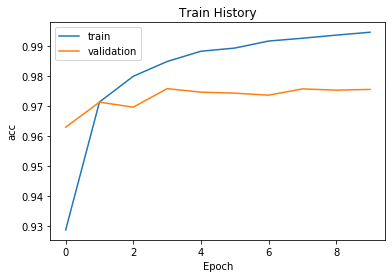

In [11]:
show_train_history(train_history,'acc','val_acc')

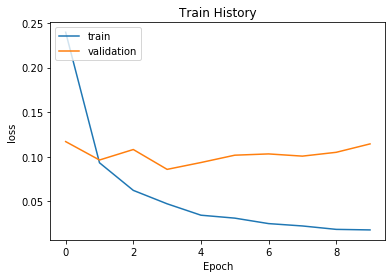

In [12]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [13]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 0s 26us/step

accuracy= 0.978
